<a href="https://colab.research.google.com/github/FelixMedrano/Deep_Learning/blob/main/FelixMedrano_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Deep Learning – CAP 4613**

Assignment 4


Felix Medrano

Z23444270

https://colab.research.google.com/drive/1PkO7EHPncvDqguaK5LUkowQk8f9o_1NO?usp=sharing



# Problem 1


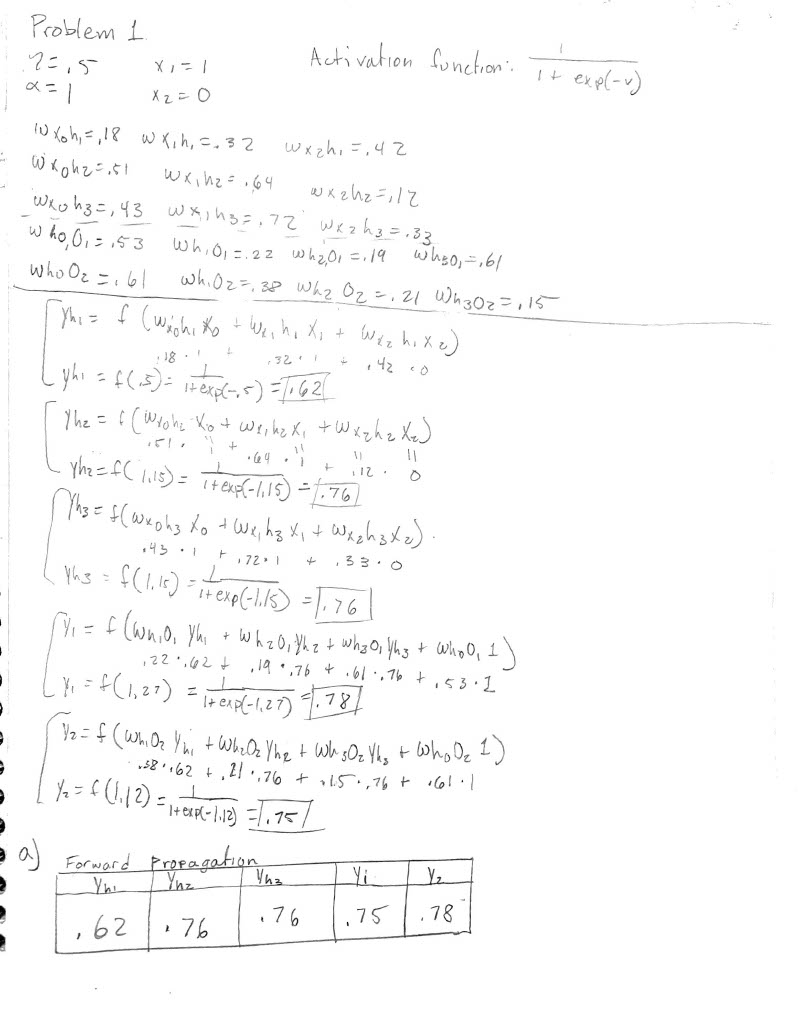

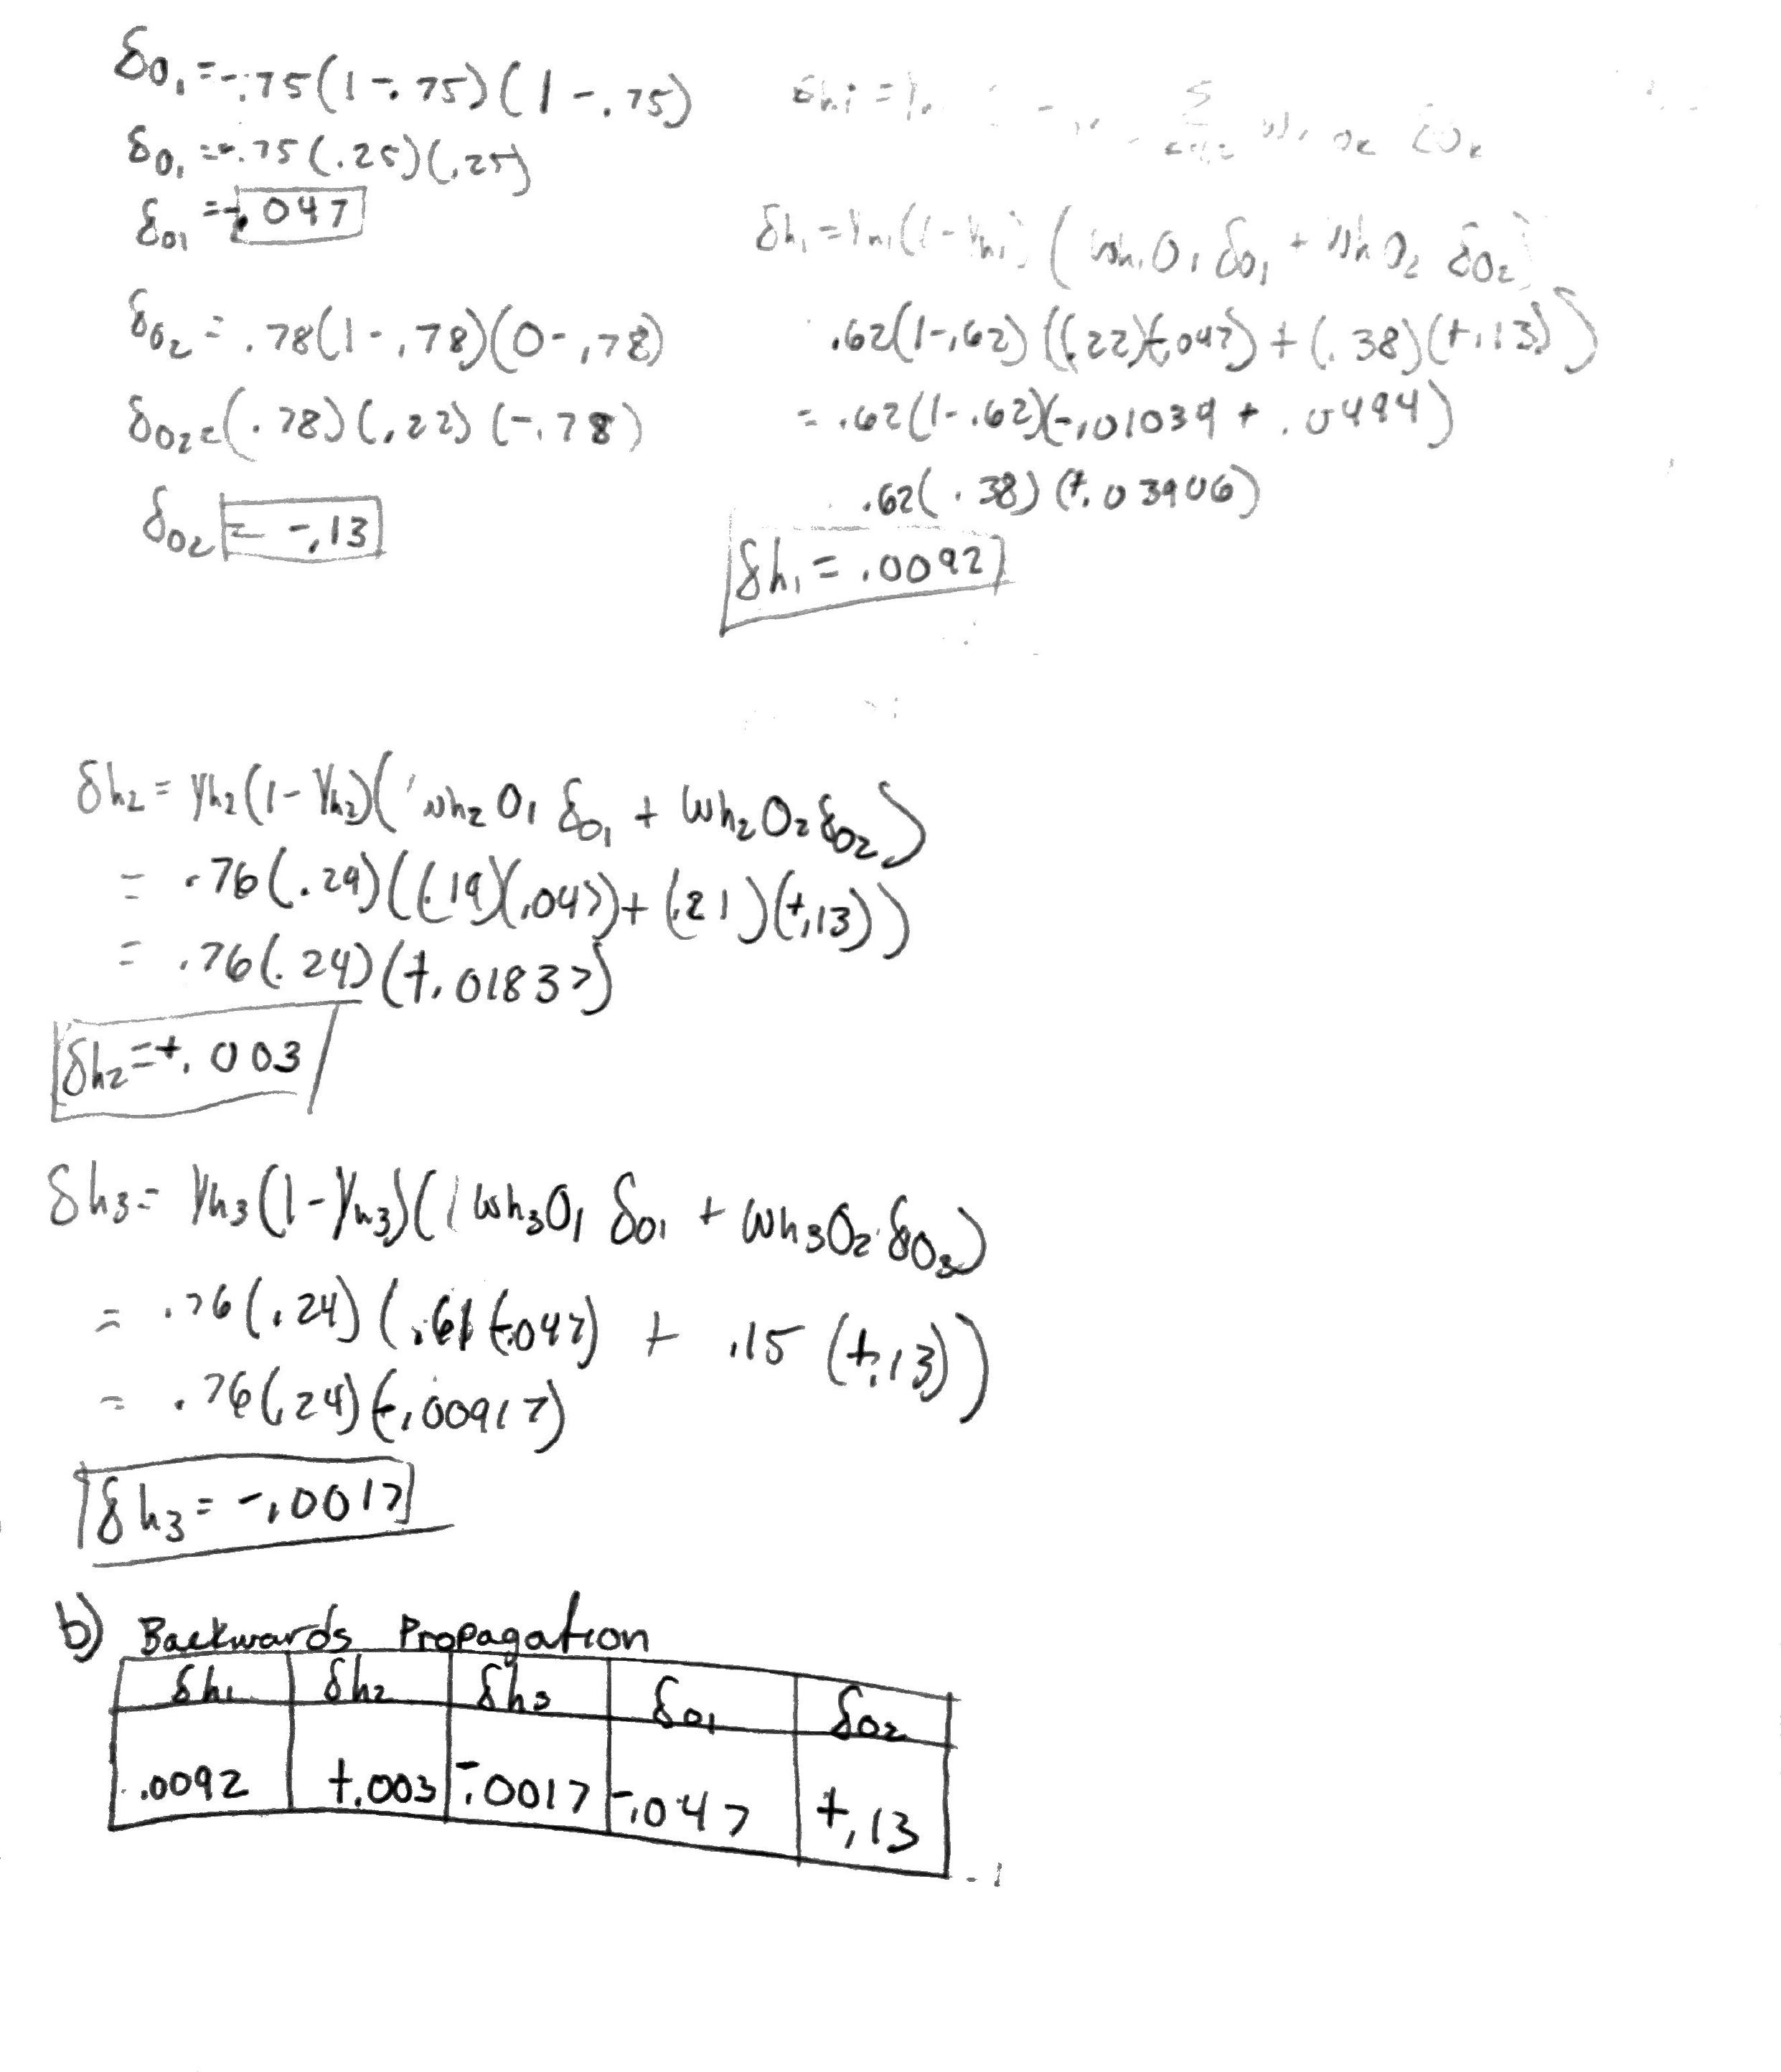

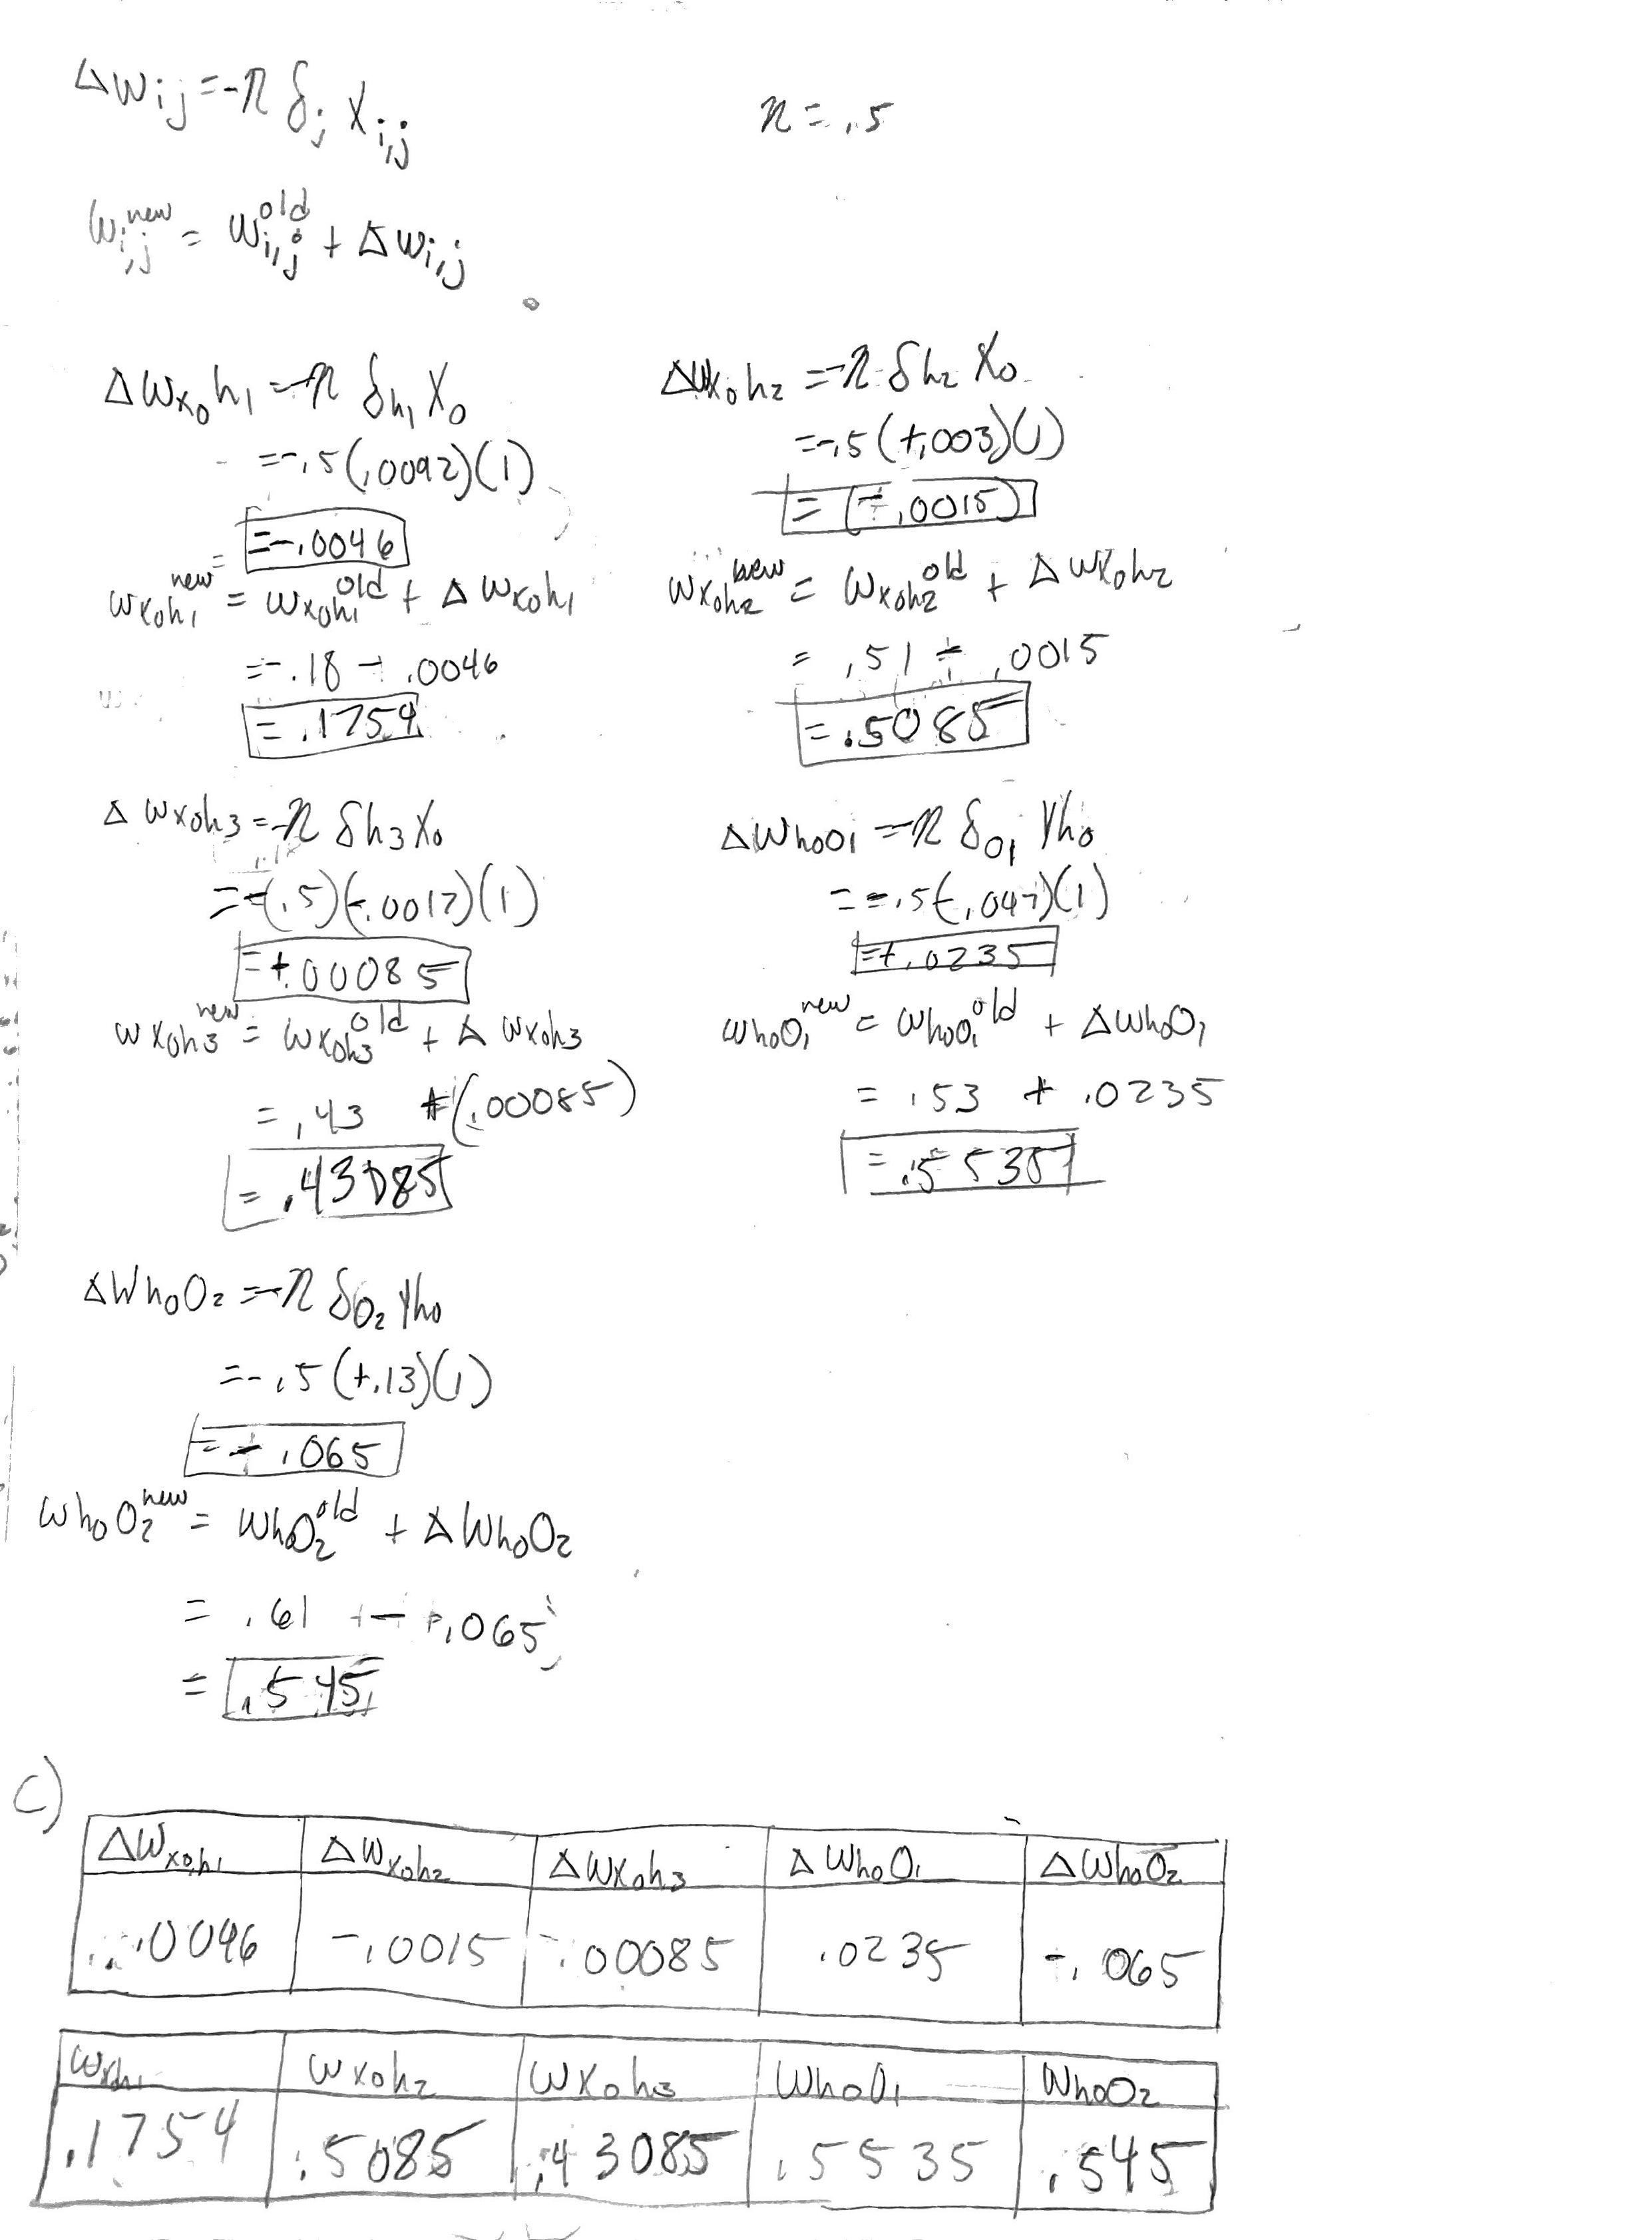

# Problem 2

## 2.1 Code:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#define

model_a= Sequential()
model_a.add(Dense(input_dim=2,units=2, activation='tanh'))
model_a.add(Dense(units=1, activation='sigmoid'))

model_a.summary()



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


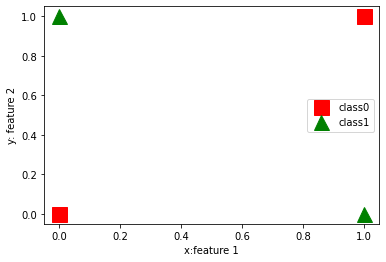

In [ ]:
from keras.optimizers import SGD

model_a.compile(optimizer=SGD(lr=0.1),
                loss='binary_crossentropy',
                metrics=['accuracy'])

#arrays
features=np.array([[0,0],[0,1],[1,0],[1,1]])
labels=np.array([0,1,1,0])
classes=[0,1]

plt_fun(features,labels,classes)

In [ ]:
history=model_a.fit(features,labels,
                    batch_size=1,
                    epochs=200,
                    verbose=1)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.4333
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.5667
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.2667
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7327 - accuracy: 0.7333
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.8333
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.7333
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.8333
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.7333
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7333
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.5333
Epoch 11/200
4/4 [===========

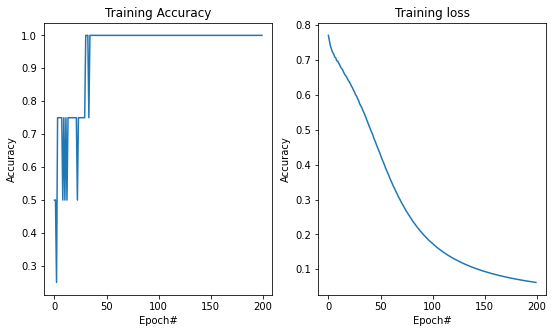

In [ ]:
plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)


In [ ]:
#evaluation and prediction
#evaluating
test_samples=np.array([[0,0],[1,0]])
test_y=np.array([0,1])
score=model_a.evaluate(test_samples,test_y)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#predicting
test_samples=np.array([[0,0],[1,0]])
test_class1_prob=model_a.predict(test_samples)
print('The probability of class 1 for the test samples is: \n',
      test_class1_prob)
test_lab=np.uint8(test_class1_prob>0.5)
print('The classes for the test samples is: \n', test_lab)


1/1 [==============================] - 0s 92ms/step - loss: 0.0634 - accuracy: 1.0000
Total loss on testing set:  0.06338262557983398
Accuracy of testing set:  1.0
The probability of class 1 for the test samples is: 
 [[0.04744437]
 [0.9248179 ]]
The classes for the test samples is: 
 [[0]
 [1]]


## 2.2 Graph solution

[-2.7822742  2.64553   -1.2640716]
[-2.6412401  2.739603   1.2719678]


<function matplotlib.pyplot.show>

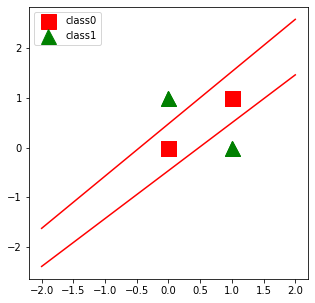

In [ ]:
weights=model_a.layers[0].get_weights()
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms=np.array(weights[0][:,node_i])
  thre_parms=np.append(thre_parms, weights[1][node_i])
  print(thre_parms)
  plot_fun_thr(features,labels,thre_parms, classes)
plt.show

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plt_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^',markersize=15)
  plt.xlabel('x:feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['class'+str(classes[0]),'class'+str(classes[1])])
  plt.show

def plot_fun_thr(features,labels,thre_parms,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
           features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^',markersize=15)
  x1=np.linspace(-2,2,50)
  x2=-(thre_parms[0]*x1+thre_parms[2])/thre_parms[1]
  plt.plot(x1,x2,'-r')
  plt.legend(['class'+str(classes[0]),'class'+str(classes[1])])
  

def plot_curve(accuracy_train,loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training loss')
  
  plt.pause(.5)
  plt.show


    



## 2.3 Solution explanations:

C.
  The number of layers and nodes that are going  to be needed are 2 layers because the data samples are not linearly seperable and we will need 3 nodes, two in the  first layer and one in the second. the two will give us two lines to seperate class 1 and 0 the second will help differentiate the 2

E. my selection for the loss function is binary cross entropy because it looks like the best way to get more accurate results since it minimizes distance between two results

## 2.4 Solutions for repeated steps with 2+ nodes and 400 epochs 

### images

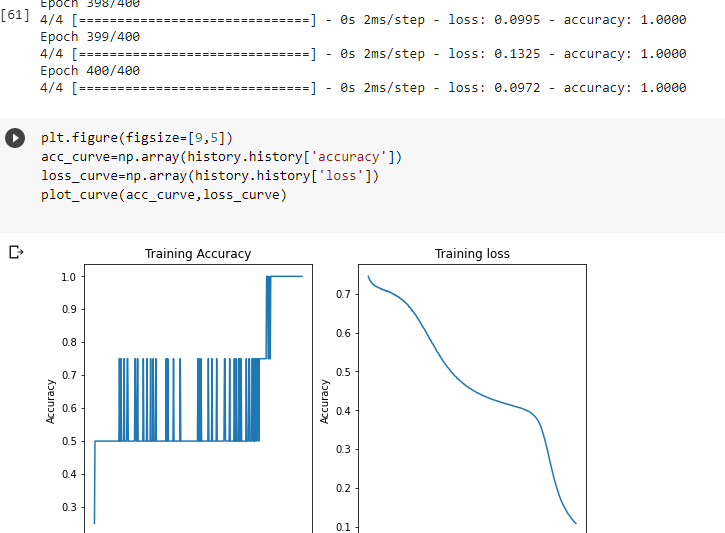

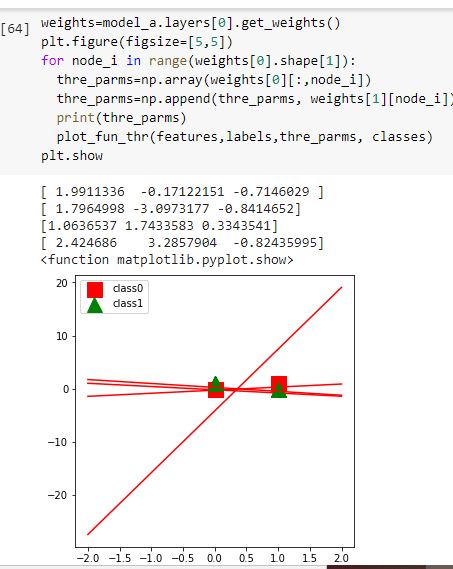

### Explanation part J 

J.
  The behavior demostrated by the classifier lines is that it over classifies and becomes very confusing when 2 more nodes is added to the first layer. It becomes so specific to the point where the plot graphed is not very useable and does not really show the classifier lines doing their job. Therefore, it is more beneficial to use the inital 2 nodes in the first layer for a total of 3 nodes rather than 4 nodes in the first layer for a total of 5 layers

# Problem 3




## 3.1 Code:

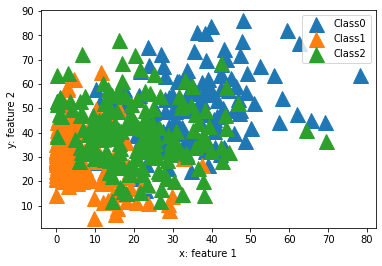

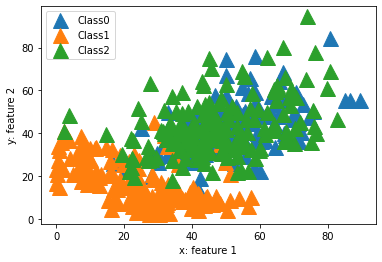

In [ ]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train),(x_test,y_test)=mnist.load_data()

classes=[0,1,2]

x_train_012= x_train[np.logical_or.reduce((y_train==0, y_train==1, y_train==2)),:,:]
y_train_012= y_train[np.logical_or.reduce((y_train==0, y_train==1, y_train==2))]



x_test_012= x_test[np.logical_or.reduce((y_test==0, y_test==1, y_test==2)),:,:]
y_test_012= y_test[np.logical_or.reduce((y_test==0, y_test==1, y_test==2))]

num_train_img=x_train_012.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_012=x_train_012[train_ind_s,:,:]
y_train_012=y_train_012[train_ind_s]

#20% of images
x_val_012=x_train_012[0:2533,:,:]
y_val_012=y_train_012[0:2533]

x_train_012=x_train_012[2533:,:,:]
y_train_012=y_train_012[2533:]
#img_plt(x_train_012[0:10,:,:],y_train_012[0:10])
feature_train=feat_extract(x_train_012)
feature_val=feat_extract(x_val_012)
feature_test=feat_extract(x_test_012)
#print('Plotting the features of 500 training images')
feat_plot(feature_train[1:500,0:2],y_train_012[1:500],classes)
feat_plot(feature_train[1:500,2:4],y_train_012[1:500],classes)


In [ ]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, table):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:],cmap='gray')
    #plt.title('Label: '+ str(labels[i-1]))
    plt.show

def feat_extract(images):
  width=images.shape[1]
  height=images.shape[2]
  features=np.zeros((images.shape[0],4))
  features_temp=np.sum(images[:,0:int(width/2),0:int(height/2)],axis=2)
  features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,0:int(width/2),int(height/2):],axis=2)
  features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,0:int(height/2)],axis=2)
  features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,int(height/2):],axis=2)
  features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
  return features

def feat_plot(features,labels,classes):
  for class_i in classes:
    
    plt.plot(features[labels[:]==classes[class_i],0],
             features[labels[:]==classes[class_i],1],'^',markersize=15)
  
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+ str(classes[class_i])for class_i in classes])

  plt.show()


## 3.2 Solution:

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1006/1006 [==============================] - 1s 936us/step - loss: 1.1334 - accuracy: 0.4443
Epoch 2/50
1006/1006 [==============================] - 1s 990us/step - loss: 1.0635 - accuracy: 0.4821
Epoch 3/50
1006/1006 [==============================] - 1s 988us/step - loss: 1.0105 - accuracy: 0.5193
Epoch 4/50
1006/1006 [==============================] - 1s 999us/step - loss: 0.9779 - accuracy: 0.5794
Epoch 5/50
1006/1006 [==============================] - 1s 1ms/step - loss: 0.9574 - accuracy: 0.5768
E

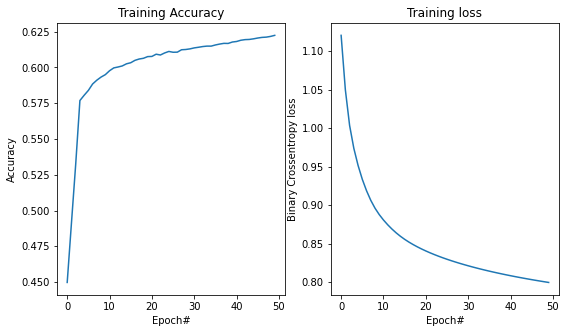

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary Crossentropy loss')
  plt.title('Training loss')
  plt.show()


model_a=Sequential()
model_a.add(Dense(input_dim=4,units=10, activation='tanh'))
#model_a.add(Dense(units=50, activation='tanh'))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()
model_a.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=0.0001,decay=0.0001),
                metrics=['accuracy'])

from keras.utils import to_categorical
y_train_012_c= to_categorical(y_train_012,len(classes))
y_val_012_c= to_categorical(y_val_012,len(classes))
y_test_012_c= to_categorical(y_test_012,len(classes))

history=model_a.fit(feature_train,y_train_012_c,
                    batch_size=16,
                    epochs=50,
                    verbose=1)

score=model_a.evaluate(feature_train,y_train_012_c)
print('Total loss on training set is: ', score[0])
print('Total Accuracy on training set is: ', score[1])

score=model_a.evaluate(feature_val,y_val_012_c)
print('Total loss on validation set is: ', score[0])
print('Total Accuracy on validation set is: ', score[1])

score=model_a.evaluate(feature_test,y_test_012_c)
print('Total loss on test set is: ', score[0])
print('Total Accuracy on test set is: ', score[1])


plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)


### Written part e, f, and g

#### Part e

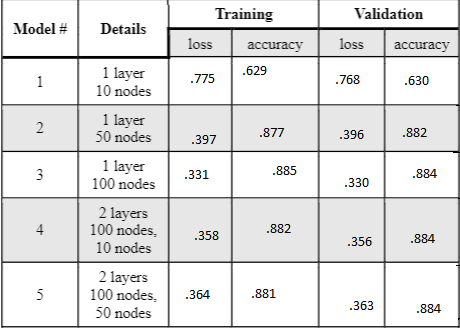

#### Part f

What we can see when we increase the number of nodes and layers is that any increase is better than having 1 layer with 10 nodes. For both training and Validation sets the loss decreases and accuracy increases dramatically when there is an increase in layers and nodes. However there does appear to be a threshold where if we add more layers and nodes the accuracy decreases and loss increase. Although the change is a very small value there is a decrease in its effectiveness nonetheless. For instance from model 3 to 4 we increase the number of layers and nodes, however the loss increases and accuracy decrease. Which for a neural network is not what we want. This is likely due to the network overfitting the data. Given the data collected it can be determined that the most suitable model for our given data is model numbe 3 since it can be seen that out of all the models it has the lowest loss value and highest accuracy. 1 layer with 100 nodes is the most optimal.

#### Part g

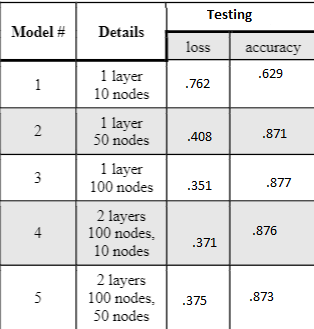

After running the models on the testing set we can see that this set followed the trends portrayed in the testing and validation set. Although there was an improvement when more layers and nodes were added, there was a point when the quality started to decrease. Much like the other set the best model for this set is model 3 since it  has the highest accuracy and lowest loss value. 